<a href="https://colab.research.google.com/github/RevanthBN/Alto-Neuroscience-Data-Challenge/blob/main/Alto_neuroscience_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alto Neuroscience - Data Challenege**

---


#### **Inspiration**

Based on an initial understanding of the dataset, it is evident that a lot of questions can be posed and understood using the given dataset and I believe some of it comes from the questions which the dataset itself poses - 

* How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
`
* What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?

I think this would be a good start to do some exploratory data analysis on the dataset. On a side note, I also felt like a couple more questions can be helpful in understanding Mental Health in tech workspace. On a more formal note, I would like to select the following questions and work on them:

#### **Problem Formulation**


1.   **Prediction of whether somebody needs treatment based on what they fill into the survey.** On a deeper level, the is to understand what factors are the best for predicting someone's mental health and understanding if a similar survey or questionnaire can be used again to guage somebody's mental health, expecially in the workforce domain and be able to offer them the right help. 

2.   **Correlation among various factors, to see which combination is most relevant to understand what factors have the most correlation with the need for treatment.** In here I am trying to club factors (or rather features like **work-culture - combination of tech vs non-tech, remote vs in-person, size of the company and openess about mental health**) that could give a better understanding of the mental health stats of a person. 

#### **Approach**

Having chosen the above questions to explore or to solve, I think I would take more of a scholastic approach to the problem. I intend to do it in the following steps:

##### **Common Steps:**
- Load the data from the Kaggle dataset
- Initial exploratory analysis of the data
- Data Preperation and cleaning to remove any anomalies
- Understanding intrinsic statistical trends - no ML
- Feature Engineering
- Train - Validation - Test split
- Feature Selection using Cross-correlation

##### **Problem - 1 - Approach**
- Feature Ranking using Importance techniques
- Deploy ML Models for predicting the need for treatment
- Evaluate the models and choose the best one
- Final testing of the model on the test data

##### **Problem - 2 - Approach**
- Work Culture - Feature Selection
- Correlation between features on a heatmap





## **Understanding the dataset**
---
### **Dataset Information**

This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.

### **Content**


* **Timestamp**
* **Age**
* **Gender**
* **Country**
* **state:** If you live in the United States, which state or territory do you live in?

* **self_employed:** Are you self-employed?

* **family_history:** Do you have a family history of mental illness?

* **treatment:** Have you sought treatment for a mental health condition?
* **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
* **no_employees:** How many employees does your company or organization have?
* **remote_work:** Do you work remotely (outside of an office) at least 50% of the time?
* **tech_company:** Is your employer primarily a tech company/organization?
* **benefits:** Does your employer provide mental health benefits?
* **care_options:** Do you know the options for mental health care your employer provides?
* **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
* **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
* **anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
* **leave:** How easy is it for you to take medical leave for a mental health condition?
* **mentalhealthconsequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?
* **physhealthconsequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?
* **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
* **physhealthinterview:** Would you bring up a physical health issue with a potential employer in an interview?
* **mentalvsphysical:** Do you feel that your employer takes mental health as seriously as physical health?
* **obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
* **comments:** Any additional notes or comments


## **Importing all necessary libraries**

In [1]:
# importing key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from matplotlib.pyplot import *
import math
import seaborn as sns

# importing scikitlearn tool-kit libraries for model deployment
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# import scikitlearn classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')


## **Downloading the dataset**
---
Download the dataset from the kaggle site. I have used the Kaggle API command to do this here by uploading the kaggle.json file to the drive and then loading the dataset from the Kaggle site directly onto the server.

In [2]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Downloading kaggle 
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! pip install --upgrade --force-reinstall --no-deps kaggle
# Downloading the dataset from the Kaggle site
! kaggle datasets download -d osmi/mental-health-in-tech-survey
! unzip /content/mental-health-in-tech-survey.zip
# Rerun this code if it throws an error 

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
mental-health-in-tech-survey.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/mental-health-in-tech-survey.zip
replace survey.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## **Exploring the Dataset and loading it**

In [4]:
# Load the csv file into a dataframe
raw_data = pd.read_csv('/content/survey.csv')
# View the loaded df to understand the structured data
raw_data.head(3)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## **Data Preperation and Cleaning to remove any anomalies**

* From the initial observation of the dataframe, the comments column seems to be the most irrelevant one as most of the entries in this column are null. Hence we can drop it.
* Another seemingly irrelevant column is the time frame column which doesn't really have that much of an information which could help in the prediction of whether treatment is required or not.

**Note that the df has been updated directly using the inplace option setting to TRUE**

In [6]:
raw_data.drop(columns=['Timestamp','comments'], inplace = True)
# Looking for NaN values across the dataframe
raw_data.isnull().any()

Age                          False
Gender                       False
Country                      False
state                         True
self_employed                 True
family_history               False
treatment                    False
work_interfere                True
no_employees                 False
remote_work                  False
tech_company                 False
benefits                     False
care_options                 False
wellness_program             False
seek_help                    False
anonymity                    False
leave                        False
mental_health_consequence    False
phys_health_consequence      False
coworkers                    False
supervisor                   False
mental_health_interview      False
phys_health_interview        False
mental_vs_physical           False
obs_consequence              False
dtype: bool

* Taking a look only at the geographical locations mentioned in the df, it is quite evident that almost a little more than half of them belong to the US as only those many state entries exist, which might be useful only in the case of trying to undertsand how the mental health attitude varies across the country. **For now, I will skip the focus on the country and the state columns.**
* On further inspection of the dataset, it becomes relevant that the entries in the dataset aren't consistent. *NaN values are present in the columns 'state', 'self_employed' and 'work_interfere' which we would need to look further and replace with a suitable alternative.*
* In case of 'self_employed', it makes sense to replace NaN with a 'No' as those blank entries essentially mean that the person isn't self employed. 
* The same cannot be done for the 'work_interfere' case as some of them have left the entries blank, which probably implies we add another entry like "Uncertain"

In [7]:
# NaN to No in self_employed
raw_data['self_employed'].value_counts()
raw_data['self_employed']=raw_data['self_employed'].fillna('No')

# NaN to Uncertain in work_interfere
raw_data['work_interfere'].value_counts()
raw_data['work_interfere']=raw_data['work_interfere'].fillna('Uncertain')

# Value counts after cleaning
print("self_employed:\n",raw_data['self_employed'].value_counts())
print("\nwork_interfere:\n",raw_data['work_interfere'].value_counts())

self_employed:
 No     1113
Yes     146
Name: self_employed, dtype: int64

work_interfere:
 Sometimes    465
Uncertain    264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


* Digging a little further onto the dataset, it is evident that the unique entries in the dataset aren't quite consistent. It would be ideal to regroup them into *'Male', 'Female' and 'Other'.* 
* Another important step is being able to see the responses in different columns and group them accordingly, to avoid inconsistencies in the entries that have been made in the df.

In [8]:
print("The unique values of the 'Gender' column are: \n")
print(raw_data['Gender'].unique())

# Regrouping the entries into 'Male', 'Female' and 'Other'
raw_data['Gender'].replace(['M','Male','Male ', 'male',  'm', 'Male-ish', 'Cis Male',
                     'Man', 'cis male', 'Mail',  'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

raw_data['Gender'].replace(['Female ', 'female', 'F',  'Woman', 'f',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake','Female ', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

raw_data["Gender"].replace(['Trans-female', 'something kinda male?','Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne',  'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

# Printing the unique values after regroupingg
print("\n\nThe unique values of the 'Gender' column are: \n")
print(raw_data['Gender'].unique())

The unique values of the 'Gender' column are: 

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


The unique values of the 'Gender' column are: 

['Female' 'Male' 'Other']


Another column of our interest would be 'Age' as it is going to be part of our analysis further down.  

In [9]:
print("The unique values of the 'Age' column are:\n")
print(raw_data['Age'].unique())

The unique values of the 'Age' column are:

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


* On insepcting the 'Age' column, it is evident that there are values off the normal age group. 
* Assuming that the standard working range for age has to be above 15 on an average acoss the world, it can help us rule out the entries falling below this range.
* Similarly, it doesn't make sense that the age of a person can be above 75 and they are still working in tech, on a practical note. 
* Hence the range of [15,75] should suffice, and we can impute the other values from the dataset.

In [10]:
raw_data.drop(raw_data[raw_data['Age'] < 15].index, inplace = True) 
raw_data.drop(raw_data[raw_data['Age'] > 75].index, inplace = True)
print("The unique values of the 'Age' column after pruning are:\n")
print(raw_data['Age'].unique())

The unique values of the 'Age' column after pruning are:

[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


Taking a look further into the other columns of interest and seeing if there ae any anomalies to be fixed.

In [ ]:
for col in raw_data:
  print("The unique values of the '%s' column are:"%col)
  print(raw_data[col].unique())
  print("\n")

* On exploring the country counts, it can be noticed that the following country counts exist.
* This can only mean that, we either group these by USA, UK, Europe, Asia, Africa and Australia. But given the nature of the dataset is highly imbalanced here, I think it is best to store this in a duplicate dataset and remove it from the existing one. 
* Same applies to the 'state' column. 

In [12]:
raw_data['Country'].value_counts()
# Making a copy, if we want to use it later on
copy_raw_data = raw_data
# Imputing the country and state columns from the original df
raw_data.drop(columns=['Country','state'], inplace = True)

Another seemingly unimportant step is to replace *Don't know, Maybe and Not sure* to *Uncertain*, so that we can keep it uniform and consistent across the entire dataset.

In [13]:
for col in raw_data:
  raw_data[col].replace(['Maybe','Don\'t know','Not sure'],'Uncertain', inplace=True)
  print("The unique values of the '%s' column are:"%col)
  print(raw_data[col].unique())
  print("\n")

The unique values of the 'Age' column are:
[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]


The unique values of the 'Gender' column are:
['Female' 'Male' 'Other']


The unique values of the 'self_employed' column are:
['No' 'Yes']


The unique values of the 'family_history' column are:
['No' 'Yes']


The unique values of the 'treatment' column are:
['Yes' 'No']


The unique values of the 'work_interfere' column are:
['Often' 'Rarely' 'Never' 'Sometimes' 'Uncertain']


The unique values of the 'no_employees' column are:
['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']


The unique values of the 'remote_work' column are:
['No' 'Yes']


The unique values of the 'tech_company' column are:
['Yes' 'No']


The unique values of the 'benefits' column are:
['Yes' 'Uncertain' 'No']


The unique values of the 'care_options' column are:
['Uncertain' 'No' 'Yes']


The unique values of the 'wellne

**Now the original dataset looks good to go for some initial analysis!!**

## **Understanding intrinsic statistical trends - no ML**

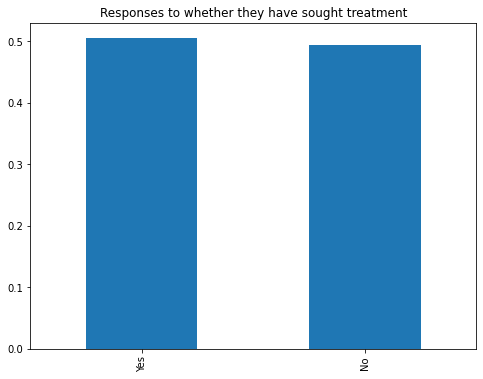

In [14]:
# Plotting the column - 'treatment' in the form of a pie chart to understand some trends that lie within the dataset without any ML.
col_count = raw_data['treatment'].value_counts(normalize = True)
plt.figure(figsize=(8,6))
col_count.plot(kind='bar')
plt.title('Responses to whether they have sought treatment');


On looking at the above plot, it is evident that the responses for whether the subjects want to get treatment is approximately 50%. This is a fairly well distributed dataset in terms of the final classes for our first problem, i.e., predicting if somebody needs treatment based on their replies. 

It might be interesting to visualize any trends in the responses with respect to age group, gender. It would be interesting to see how these affect the mental health of the subjects within these subgroups. 

<Figure size 1080x576 with 0 Axes>

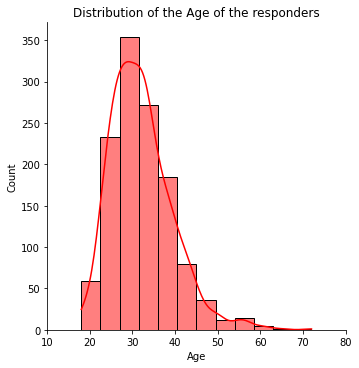

In [15]:
# raw_data.plot.hist(by='Age', bins=12)
plt.figure(figsize=(15,8));
sns.displot(raw_data['Age'], kde=True, 
             bins=12, color = 'red');
plt.xlim(10,80);
plt.title("Distribution of the Age of the responders");

* On looking at the above distribution, it is evident that the age distribution among the subjects is clearly shifted towards the left of the plot.
* This suggests that the majority of the reponders are young, mostly between 20-30, suggesting how the younger population is into the tech-workspace and they are the ones most likely to face with mental health issues given the stress and the work offloaded onto them.
* This could also shed some light as to how the younger population insists on working in the tech-domain, and how 50% of them would have considered taking treatment or not. 

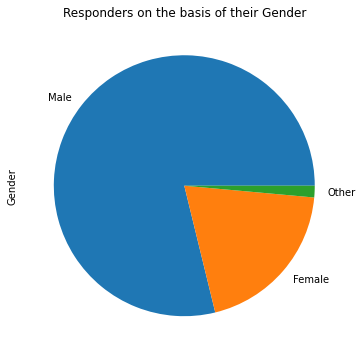

In [16]:
# Plotting the column - 'Gender' in the form of a pie chart to understand some trends that lie within the dataset without any ML.
col_count = raw_data['Gender'].value_counts(normalize = True)
plt.figure(figsize=(8,6))
col_count.plot(kind='pie')
plt.title('Responders on the basis of their Gender');

* Again, on inspection of the Gender, we can clearly observe the uneven distribution of the responders. 
* There appear to be around 80% of males (value count/sum), this kind of rules out the fact that any conclusion can be made with respect to Gender. 
* This is because, the results might show some faulty assumptions that males might be more susceptible to mental health issues than females, but this could be due to the underlying imbalance in the dataset. 
* Moreover, this could be a conclusion as to the number of males being more than the number of females in the tech industry. This can be validated by actually seeing the distribution of the tech vs non-tech column.

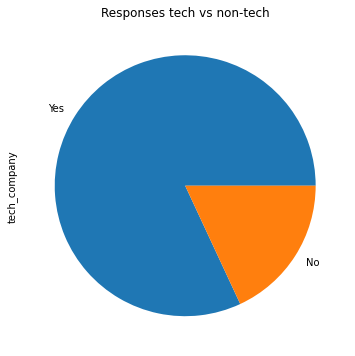

In [17]:
# Plotting the column - 'tech_company' in the form of a pie chart to understand some trends that lie within the dataset without any ML.
col_count = raw_data['tech_company'].value_counts(normalize = True)
plt.figure(figsize=(8,6))
col_count.plot(kind='pie')
plt.title('Responses tech vs non-tech');

* Again, the responders in the dataset are mostly people working in tech companies. (around 80%)
* These three plots could clearly help infer the fact that most of the responders were working in tech companies during the survey, most of them being males belonging to a 20-30 age group. It would be interesting to validate such a trend.
* This could shed light on how young males form a good sized poplation of the workforce in tech, and how almost 50% of them have sought some sort of treatment for mental health issues (although the 50% is for the larger population, it is interesting to be able to draw such conclusions)





## **Feature Engineering**


---

* One important step in the process of being able to generate features from the columns of the dataset is being able to encode them into numerical values rather than categorial values that had been seen before. 
* I chose to delete a couple of rows of data, expecially with the wrong age groups rather than imputing them with the mean of the classes because of the fact that these responses sometimes couln't have been serious and they might pose as outliers. 
* Another possible solution in this case is being able to fill these with the mean or the median of those columns. 
* In this step, I am going to encode the data in the form of numerical codes and not one-hot vectors. Age is already in the form of numerical values, I'll leave it unchanged for now.

In [18]:
# Label encoding for all the categorial values expect Age
encoder = LabelEncoder()
m2=raw_data.loc[ : , raw_data.columns != 'Age']
for col in m2:
  encoder.fit(raw_data[col])
  raw_data[col] = encoder.transform(raw_data[col])

In [19]:
# Verifying that various columns have been encoded into numerical values
# column - treatment
print(raw_data['treatment'].value_counts())
# column - gender
print(raw_data['Gender'].value_counts())
# column - work_interfere
print(raw_data['work_interfere'].value_counts())

1    632
0    619
Name: treatment, dtype: int64
1    986
0    247
2     18
Name: Gender, dtype: int64
3    464
4    262
0    212
2    173
1    140
Name: work_interfere, dtype: int64


On encoding and verifying, it can be infered that our features have been encoded for further deployment.

In [20]:
# Scaling the Age column to make it consistent with the other columns
scaler = MinMaxScaler()
raw_data['Age'] = scaler.fit_transform(raw_data[['Age']])
raw_data.head()


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.351852,0,0,0,1,1,4,0,1,2,1,0,2,2,1,0,0,1,2,0,1,2,0
1,0.481481,1,0,0,0,2,5,0,0,1,0,1,1,1,2,1,0,0,0,0,0,1,0
2,0.259259,1,0,0,0,2,4,0,1,0,0,0,0,1,0,0,0,2,2,2,2,0,0
3,0.240741,1,0,1,1,1,2,0,1,0,2,0,0,0,0,2,2,1,0,1,1,0,1
4,0.240741,1,0,0,0,0,1,1,1,2,0,1,1,1,2,0,0,1,2,2,2,1,0


The above step is important because of the fact that Age is numeric and it is varied in terms of the values, hence having to scale it to a value between 0 and 1 makes it easier to process the data. Another approach could be grouping age into age groups and working on it from there like categorical variables.

## **Train - Validation - Test Split**


---
* I've split the data into Train:Val:Test in the ratio of 60-20-20. 
* The train set will be used to identify the best features, train the models.
* The val set will be used to evaluate the models and the test set will be used for evaluating the best model.


In [21]:
# X --> all columns except the treatment column
X = raw_data.drop('treatment', axis = 1)
# Y --> treatment column
Y = raw_data['treatment']
# Splitting X and Y into 80 - 20 train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# Splitting X_train  and Y_train into 60-20 train and val set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


## **Feature Selection on the basis of Cross-correlation with the Target variable**

---

*   The important aspect of feature selection is to find some kind of a cross-correlation between all the 22 columns and the target column - "treatment" and choose the ones that give us a good cross_correlation index. 

* For this, the first step would be to understand how the features/columns correlate with each other.




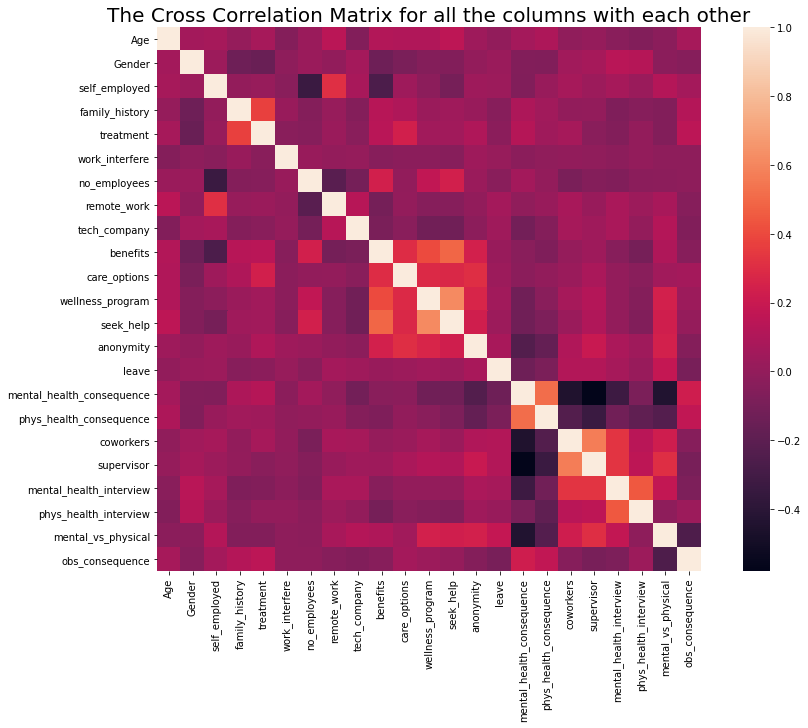

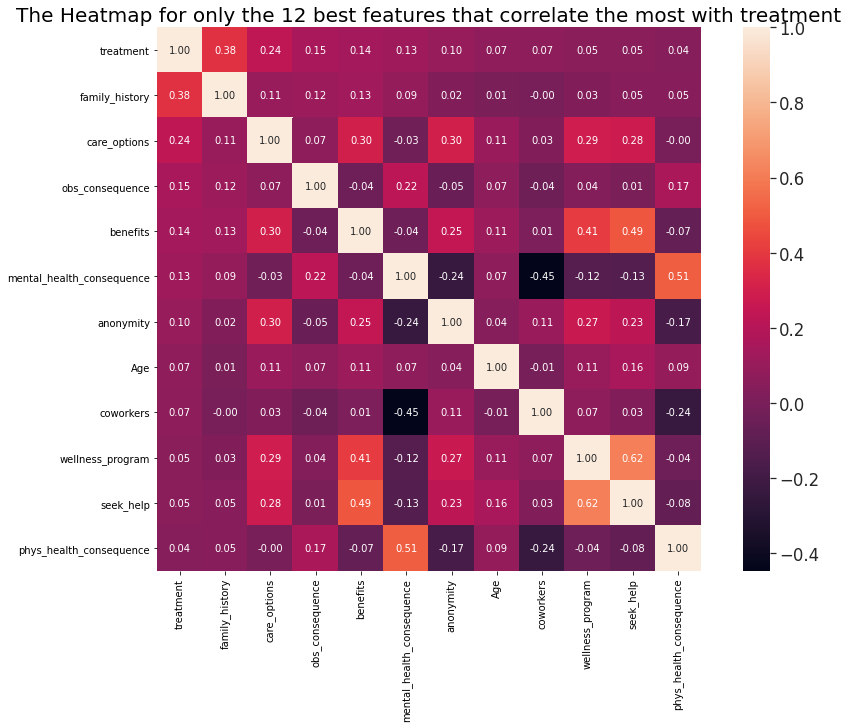

In [22]:
# Compute the cross correlation matrix of the dataframe
cross_corr = raw_data.corr(method='pearson')
# Visualizing the cross-corr matrix
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cross_corr, vmax=1.0, square=True);
plt.title ("The Cross Correlation Matrix for all the columns with each other", fontsize = 20)
plt.show()
# Trying to guage what features are mostly correlated with treatment
# print(cross_corr['treatment'])
# Try to extract the top 12 features that are most correlated with treatment
#number of variables for the heatmap = 12
k = 12
# extract the k highest values
k_highest = cross_corr.nlargest(k, 'treatment')['treatment'].index
k_best = np.corrcoef(raw_data[k_highest].values.T)
f, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1.5)
hm = sns.heatmap(k_best, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=k_highest.values, xticklabels=k_highest.values)
plt.title("The Heatmap for only the 12 best features that correlate the most with treatment", fontsize = 20)
plt.show()


* From the above heatmap and the 
cross-correlation matrix that was computed using the standard correlation coefficient, we identify that the treatment target class is mostly correlated with classes like Age, family history, care options and beneficts available within the company, the work culture and coworkers. The impact of the nature of the work cuture and company will be analyzed further in the Problem-2. 
* For the first problem of being able to predict the requirement of treatment, I feel we could still need to include factors like work_interfere, age, gender which mostly had a 50% ratio of both needed treatment and didn't. This is one place where any bias can be ruled out by being able to use these features too because they seem quite balanced with the target class.


# Problem - 1 - Approach

## **Feature Ranking**


---
* Although the Feature selection gave us a perspective about how to go about with selecting the best features for the process, I feel generating feature importance scores would be another robust way to understand which features are most useful in classifying the data. 
* For this, I have decided to test both the CART Classification Algorithm (Decision Tree Classifier)and the Random Forest Classifier that can be able to estimate whether treatment is needed or not, based on the existing dataset. All of this is done on the training dataset to extract 10 good features that can be used further. 
* I understand there could be some ambiguity here, but here's the explanantion.
**23 features, and we need 10 best ones (I chose ten as an approximation of 50% of the features)**, From the above step, we understood that *gender, age, family history* are some useful features. In order to have a scholastic understanding of the best features, I am doing this step and not introducing any bias into the model as it is literally running a classifier and choosing the best features.
* After being fit, the model provides a *feature_importances_ property* that can be accessed to retrieve the relative importance scores for each input feature.

This has been inspired from the [following tutorial](https://machinelearningmastery.com/calculate-feature-importance-with-python/).


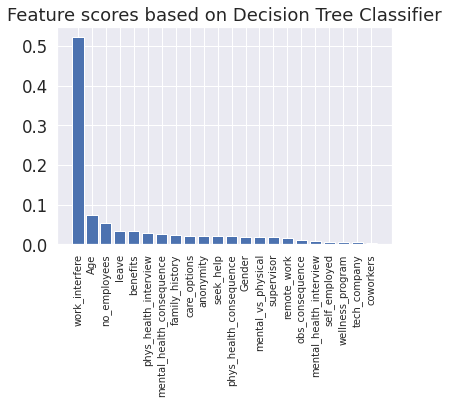

In [23]:
# decision tree for feature importance on a classification problem
model_feat_imp = DecisionTreeClassifier()
# fit the model
model_feat_imp.fit(X_train, Y_train)
# get importance
importance = model_feat_imp.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# Sorting the feature importance and adding labels
indices = np.argsort(importance)[::-1]
labels = []
for f in range(X_train.shape[1]):
    labels.append(X_train.columns[f]) 
labels_sorted_DTC = [labels[g] for g in indices]
# plot feature importance
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), labels_sorted_DTC, rotation='vertical', fontsize=10)
plt.title("Feature scores based on Decision Tree Classifier")
plt.show()




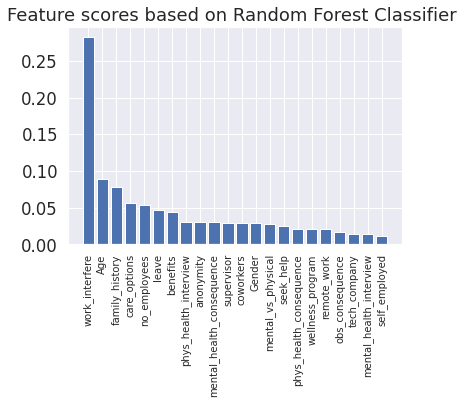

In [24]:
# decision tree for feature importance on a classification problem
model_feat_imp = RandomForestClassifier()
# fit the model
model_feat_imp.fit(X_train, Y_train)
# get importance
importance = model_feat_imp.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# Sorting the feature importance and adding labels
indices = np.argsort(importance)[::-1]
labels = []
for f in range(X_train.shape[1]):
    labels.append(X_train.columns[f]) 
labels_sorted_RFC = [labels[g] for g in indices]
# plot feature importance
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), labels_sorted_RFC, rotation='vertical', fontsize=10)
plt.title("Feature scores based on Random Forest Classifier ")
plt.show()




In [25]:
# Enlisting the best 10 features
print("\n")
print("The best features according to the RandomForestClassifier ")
print(labels_sorted_RFC[:10])
print("\n")
print("The best features according to the DecisionTreeClassifier ")
print(labels_sorted_DTC[:10])



The best features according to the RandomForestClassifier 
['work_interfere', 'Age', 'family_history', 'care_options', 'no_employees', 'leave', 'benefits', 'phys_health_interview', 'anonymity', 'mental_health_consequence']


The best features according to the DecisionTreeClassifier 
['work_interfere', 'Age', 'no_employees', 'leave', 'benefits', 'phys_health_interview', 'mental_health_consequence', 'family_history', 'care_options', 'anonymity']


* Now that both the classifiers were used to generate the scores, I think it makes sense to use the features voted by both these classifiers for a reasonable performance. 
* *Taking into consideration the Correlation steps and the Feature Ranking steps, the final features that will be used for the model deploying will be:*



**_['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere', 'mental_health_consequence','coworkers']_**


In [26]:
# Taking into account only the best features from the Train, Val and Test sets
best_features = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere', 'mental_health_consequence','coworkers']
X_train_best = X_train[best_features]
X_val_best = X_val[best_features]
X_test_best = X_test[best_features]

In [27]:
X_train_best.head()

,Age,Gender,family_history,benefits,care_options,anonymity,leave,work_interfere,mental_health_consequence,coworkers
1061,0.166667,1,0,1,1,2,3,3,1,1
216,0.222222,1,0,2,2,2,3,1,0,1
475,0.722222,1,0,2,1,1,2,3,1,0
573,0.148148,0,1,2,2,2,0,3,0,2
910,0.555556,1,0,0,0,1,1,3,2,1


## **Models Deployment and Evaluation**

---
In order to evaluate various ML models, I decided to evaluate the following models:

- Logistic Regression
- Naive Bayes Classifier
- Stochastic Gradient Descent Classifier
- KNN Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machines 
- Neural Nets

The choice of the classifiers is more of an inspiration from one of the [scikit-learn tutorials ](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html?highlight=gaussiannb)that I had used initially for one of my projects ( [The emotion recognition project using EEG](https://www.revanthbanala.com/copy-of-av-car))



In [28]:
Model_accuracies = []
Models = []
def model_evaluate(model, name='Default'):
    model.fit(X_train_best, Y_train)
    preds = model.predict(X_val_best)
    Models.append(name)
    Model_accuracies.append(round(accuracy_score(Y_val, preds), 5))
    print('---', name, '---', '\n',
          confusion_matrix(Y_val, preds), '\n',
          'Accuracy:', round(accuracy_score(Y_val, preds), 5), '\n',
          
          'AUC Score', round(roc_auc_score(Y_val, preds), 5))

In [29]:
# Logistic Regression
lg = LogisticRegression(random_state=1, solver='liblinear', max_iter=500)
model_evaluate(lg, 'Logistic Regression')

# Naive Bayes
nb = GaussianNB()
model_evaluate(nb, name='Naive Bayes')

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_evaluate(sgd, name='SGD')

# KNN
knn = KNeighborsClassifier(n_neighbors=20)
model_evaluate(knn, name='KNN')

# Decission trees
tree = DecisionTreeClassifier(criterion = 'entropy',max_features=10)
model_evaluate(tree, 'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
model_evaluate(rforest, 'Random Forest')

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_evaluate(svm, 'SVM')

# Neural Nets
nn = MLPClassifier(activation = 'tanh',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(450, 10), random_state=1, max_iter=1000)
model_evaluate(nn, 'Neural Nets')


--- Logistic Regression --- 
 [[85 41]
 [45 79]] 
 Accuracy: 0.656 
 AUC Score 0.65585
--- Naive Bayes --- 
 [[97 29]
 [35 89]] 
 Accuracy: 0.744 
 AUC Score 0.74379
--- SGD --- 
 [[81 45]
 [46 78]] 
 Accuracy: 0.636 
 AUC Score 0.63594
--- KNN --- 
 [[102  24]
 [ 41  83]] 
 Accuracy: 0.74 
 AUC Score 0.73944
--- Decission Trees --- 
 [[94 32]
 [36 88]] 
 Accuracy: 0.728 
 AUC Score 0.72785
--- Random Forest --- 
 [[ 97  29]
 [ 23 101]] 
 Accuracy: 0.792 
 AUC Score 0.79218
--- SVM --- 
 [[ 95  31]
 [ 17 107]] 
 Accuracy: 0.808 
 AUC Score 0.80844
--- Neural Nets --- 
 [[107  19]
 [ 36  88]] 
 Accuracy: 0.78 
 AUC Score 0.77944


#### **Explanation and some intuition behind the models and a little more on the Hyperparameter tuning:**

---



- **Logistic Regression:**

  In case of logistic regression classifier, I tried different solvers. As it is a small dataset, the liblinear solver worked better than the 'lbfgs' solver. A default penalty of l2 was used as a regularization parameter. I did play around with the max_iter and early stopping but it din't really help the model that much. 

- **Naive Bayes Classifier:**
  
  For the Naive Bayes Classifier, I let the classifier fit the data without tuning the hyperparameters a lot. I let the priors to None, and the performance of the classifier is way better than the logistic regression but an average level.
- **Stochastic Gradient Descent Classifier:**

  The SGD classifier implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). I set the max_iter to 5000, and a learning rate 'optimal'. I avoided class weights, as the treatment and no treatment classes are mostly balanced. 
- **KNN Classifier:**

  For the KNN classifier that votes the K nearest neighbors, I played around with the n_neighbors parameter and found out that 20 neighbors worked the best out of all the cases. 

- **Decision Tree Classifier:**

  Having used the decision tree classifier as it is, the accuracy felt a little on the lower side. Having tuned the criterion from gini to entropy boosted the performance of the classifier. I also tuned the max_features (in our case, 10) and max_depth which only deteriorated the performance of the model. 

- **Random Forest Classifier:**

  The Random Forest Classifier is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.  I started off with some basic parameters to  start with the classifier, and then increased the number of trees and the max_depth of the trees. I would have loved to play around with the hyperparameters even more so that I could have gotten better results here, which I would leave as a future implementation.
- **Support Vector Machines:**

  In case of the SVM, having played with both linear and Kernel SVM -RBF, it seemed like the function decision shape OVO gave the most accuracy for the model. 
- **Neural Nets (more of a baby-net challenge, as the dataset is quite small for actual neural nets to get really good results)**

  In lue of the fact that the dataset is small, it would be prone to overfitting while applying deep learning algorithms. Hence I stuck to an MLP classifier that can work on the small dataset. Moreover, the performance is quite stagnant owing to the probable overfitting of the model on the data despite implementing regularization and early stopping. Playing around with various activation functions, one thing that I realized is that the tanh perfomed better than relu in this case. I also tuned the NN to play with the solvers - 'lbfgs', 'sgd' and 'adam', and lbfgs seems to be the most suited for this dataset. 

One final thought regarding the models is again the "No Free Lunch" concept, as there is no one direct best solution that fits all problems. In my approach, it seems like these models and hyperparameters are a good choice. 



#### **Evaluation metrics**

---
I stuck to the **conventional evaluation metrics**:
- **Accuracy score:**  Percentage of correct predictions
- **Confusion matrix:** Table that describes the performance of a classification model (TP, TN), (FP, FN)
- **AUC Score:** The percentage of the ROC plot that is underneath the curve


## **Final Prediction on Test Data**

---
Based on the above AUC Scores and the accuracy scores, the SVM and Random Forest and Neural Nets seem to be the top three best models for this classification task of being able to predict the need for treatment based on the input features. 

Now, as the final step, these models will be evaluated on the test set to see their performance. 



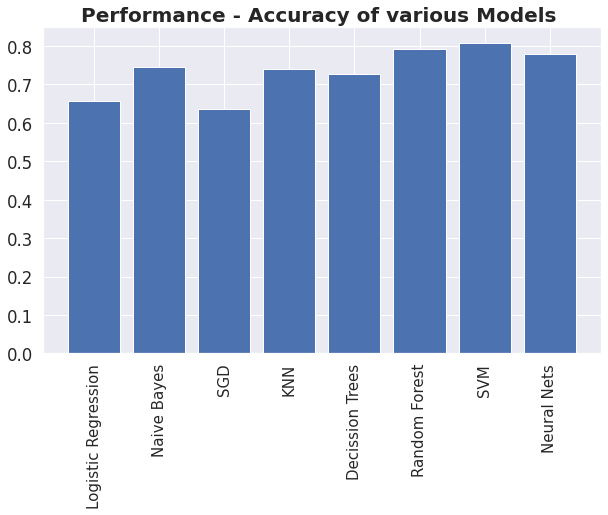

In [32]:
plt.figure(figsize=(10,6))
plt.bar(range(len(Models)), Model_accuracies)
plt.xticks(range(len(Models)), Models, rotation='vertical', fontsize=15)
plt.title("Performance - Accuracy of various Models ", fontsize=20, fontweight="bold")
plt.show()

In [33]:
def model_final_eval(model, name='Default'):
    model.fit(X_train_best, Y_train)
    preds = model.predict(X_test_best)
    print('---', name, '---', '\n',
          confusion_matrix(Y_test, preds), '\n',
          'Accuracy:', round(accuracy_score(Y_test, preds), 5), '\n',
          'AUC Score', round(roc_auc_score(Y_test, preds), 5))

In [34]:
print(Model_accuracies)

[0.656, 0.744, 0.636, 0.74, 0.728, 0.792, 0.808, 0.78]


In [35]:
# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=1)
model_final_eval(rforest, 'Random Forest')

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_final_eval(svm, 'SVM')

# Neural Nets
nn = MLPClassifier(activation = 'tanh',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(450, 10), random_state=1, max_iter=1000)
model_final_eval(nn, 'Neural Nets')

--- Random Forest --- 
 [[ 93  31]
 [ 27 100]] 
 Accuracy: 0.76892 
 AUC Score 0.7687
--- SVM --- 
 [[ 87  37]
 [ 16 111]] 
 Accuracy: 0.78884 
 AUC Score 0.78781
--- Neural Nets --- 
 [[102  22]
 [ 39  88]] 
 Accuracy: 0.75697 
 AUC Score 0.75775


* As the above performance shows, it is evident that the SVM still does the best job compared to the Random Forest and Neural Nets. 
* The Neural Nets tend to have overfit the data owning to its small size, once again proving the need for huge datasets to actually apply deep learning. 
* The Validation accuracy was slightly greater than the Test Accuracy becayse of the fact that the validation set was used to tune the hyperparameters and the val error reduces. As the test set is something that the model is seeing for the first time, the test accuracy is still around ~79% comapred to the val accuracy of ~81%. 
* I still feel this can be tuned and increased by using robust hyperparamter tuning approaches or using all of the data as features (or using PCA over Feature Importance scores). This is a part of the implementation that I am leaving for a future time owing to the time constraints of the challenge. 

# Problem - 2 - Approach

## **Work Culture - Correlation between various features**

---
On looking at the dataset, one very intruing factor that I felt was worth exploring is to see how the Work culture affects the mental health, in other words how the work_culture plays an important role in undertsanding if somebody has sought out treatment or not for any mental issues. 

For this purpose, I took a deeper look into only a subset of the features which I believe are important in determining the impact on mental health - 

**_work_culture = 'work_interfere' , 'no_employees', 'remote_work', 'benefits', 'care_options', 'wellness_program', 'leave', 'coworkers', 'supervisor',  'seek_help',  'anonymity' and 'treatment'_**


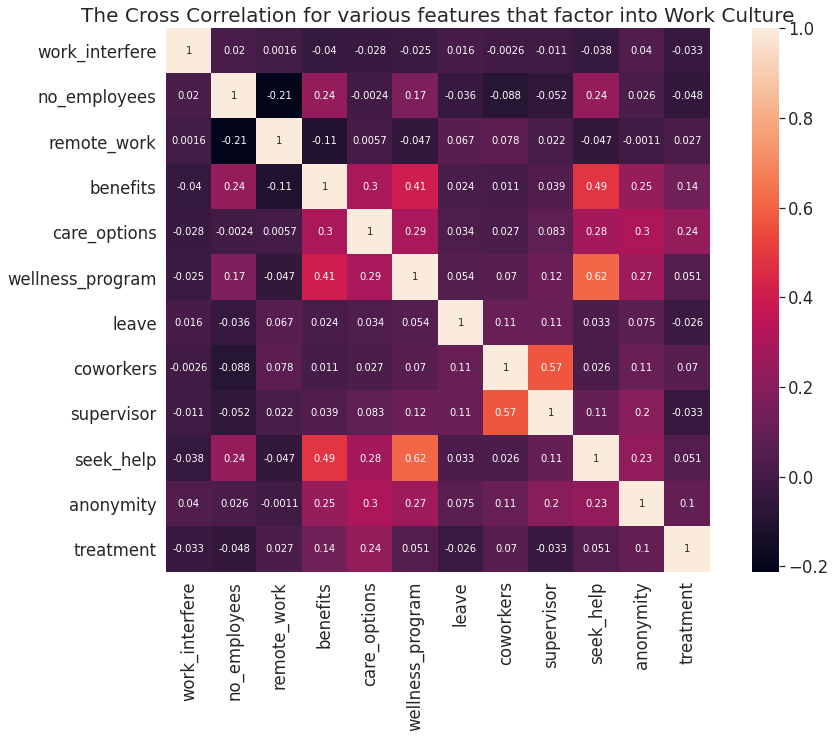

In [37]:
# Making a list of the relevant columns
work_culture = ['work_interfere','no_employees','remote_work','benefits','care_options','wellness_program','leave','coworkers','supervisor', 'seek_help', 'anonymity', 'treatment']
# Extracting the sub-dataframe from the main one pertaining to work-culture
work_data = raw_data[work_culture]
# Compute the cross correlation matrix of the dataframe
cross_corr = work_data.corr(method='pearson')
# Visualizing the cross-corr matrix
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cross_corr,annot=True, vmax=1.0,annot_kws={'size': 10}, square=True);
plt.title ("The Cross Correlation for various features that factor into Work Culture", fontsize = 20)
plt.show()




### **Some Important conclusions that can be drawn**

---


*   Firstly, the responders seem to seek treatment when there are care options, mental health benefits provided by the employer and also when the anonymity of the employee is guaranteed. 
*   The concept of seeking help is highly correlated with the availibity of wellness programs within the company. This makes sense as presence of wellness programs clearly indicates that the company is more open-minded and cares genuinely about the employees working there, hence making it easier to seek help.
* The options of benefits, care options often coincide with wellness programs and are more prominent when the size of the company is reasonable and there isn't a lot of stress added on the employees. 
* One common observation is how willing employees are to discuss mental health issues with their coworkers and their supervisors. This seems to be a reasonable correlation here, i.e., if somebody is willing to open up to their supervisor, they are equally willing to open up to their coworkers. Again this boils downs to the company and the open-mindedness of the people working there.
* In reality, remote work (although highly imbalanced) seems to not correlate with those many mental health issues, although it would be quite interesting to see how it would come into play.




# Conclusion


---
- The first major conclusion drawn about the dataset is that it is fairly balanced in terms of target column - treatment. 
- On another note, we see trends of an younger male population strongly involved in the tech-workspace, often prone to mental health issues. 
- From the above heatmap and the 
cross-correlation matrix that was computed using the standard correlation coefficient, we identify that the treatment target class is mostly correlated with classes like Age, family history, care options and beneficts available within the company, the work culture and coworkers.
- *Taking into consideration the Correlation steps and the Feature Ranking steps, the final features that will be used for the model deploying will be:*

  **_['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere', 'mental_health_consequence','coworkers']_**

- On evaluating various models, it is found that SVM still does the best job compared to the Random Forest and Neural Nets. The Neural Nets tend to have overfit the data owning to its small size, once again proving the need for huge datasets to actually apply deep learning.
- The Validation accuracy was slightly greater than the Test Accuracy becayse of the fact that the validation set was used to tune the hyperparameters and the val error reduces. As the test set is something that the model is seeing for the first time, the test accuracy is still around ~79% comapred to the val accuracy of ~81%.
- One final thought regarding the models is again the "No Free Lunch" concept, as there is no one direct best solution that fits all problems. In my approach, it seems like these models and hyperparameters are a good choice. 

---

- Just as some final thoughts, I feel like the results here can be improved in a number of ways:
  - Implement PCA to choose the best features, although feature important scores and the correlation technique are reasonably good techniques.
  - Given more time, I would love to use imputing techniques to fill out the null values and the entries that were removed on the basis of Age.
  - Develop a more robust Hyperparameter tuning approach using Grid search techniques and implement cross-validation so that the results become more robust. I stuck to the current implementation owing to the 48-hour duration of the challenge, opening room for greater improvement in the results. 
  - Implement a real-time predictor that takes into account any number of features and should be able to predict whether somebody needs treatment in real-time. 